# DATA620: Week 3 Assignment
#### by Glen Davis & Brett Davidoff

In [4]:
import io
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import random
import requests
import scipy as sp

## Introduction

We load node and edge data from https://networkrepository.com/fb-pages-tvshow.php for mutually liked verified Facebook pages related to certain TV shows, originally collected in November 2017. Nodes represent TV show pages, and edges represent mutual likes among them. We eliminate pages with non-ASCII characters in their names, then take a small subset of the remaining pages for analysis and visualization. From this subset, we also eliminate any pages that are in isolation, i.e. those not connected to other pages by any mutual likes.

In [5]:
random.seed(1006)
fn_nodes = "https://raw.githubusercontent.com/geedoubledee/data620_week3assignment/main/fb-pages-tvshow.nodes"
nodes_df = pd.read_csv(fn_nodes)
subset = ["name", "new_id"]
nodes_df = nodes_df[subset]
def check_chars(s):
    return s.isascii()
nodes_df["chars_okay"] = nodes_df["name"].apply(check_chars)
nodes_df = nodes_df[nodes_df["chars_okay"] == True]
nodes_df.sort_values(by="new_id", inplace=True)
nodes_dict = dict(zip(nodes_df.new_id, nodes_df.name))
fn_edges = "https://raw.githubusercontent.com/geedoubledee/data620_week3assignment/main/fb-pages-tvshow.edges"
resp = requests.get(fn_edges)
G = nx.read_edgelist(io.BytesIO(resp.content), delimiter=",", nodetype=int)
subset = random.sample(list(nodes_df["new_id"]), 100)
H = G.subgraph(subset)
I = H.copy()
I.remove_nodes_from(list(nx.isolates(H)))
I = nx.relabel_nodes(I, nodes_dict)

Below is a visualization of the subset of connected TV pages we've selected. We will refer to this graph as subgraph I.

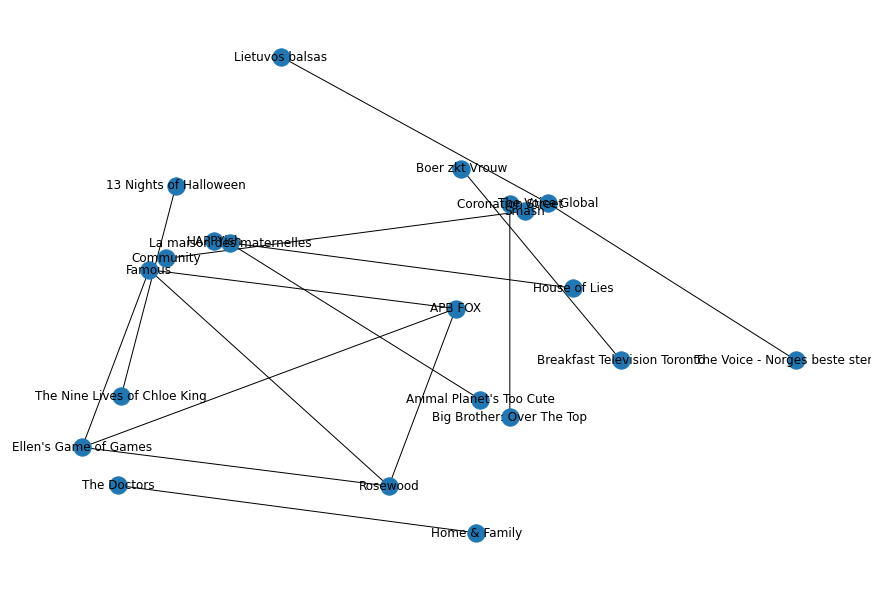

In [6]:
plt.figure(figsize=(12,8))
nx.draw_kamada_kawai(I, with_labels=True)
plt.show()

We can't calculate the diameter of subgraph I pictured above because it is not connected. However, we can calculate the diameter of the original connected graph G:

The diameter of the original connected graph G is 20.

In [7]:
#density
density = nx.density(G)
print(density)

0.0022797490611982272


In [15]:
#degree centrality
dc = nx.degree_centrality(G)

for k in dc.keys():
    print(f"{str(k).ljust(4)} ---- {dc[k]}")

0    ---- 0.0010280133641737343
1838 ---- 0.0007710100231303008
1744 ---- 0.0012850167052171678
14   ---- 0.0010280133641737343
2543 ---- 0.0015420200462606015
1    ---- 0.0038550501156515036
1009 ---- 0.003084040092521203
1171 ---- 0.005140066820868671
1465 ---- 0.004883063479825238
2069 ---- 0.0033410434335646366
2080 ---- 0.004626060138781804
1856 ---- 0.0033410434335646366
3799 ---- 0.004112053456694937
1033 ---- 0.004883063479825238
2717 ---- 0.0033410434335646366
300  ---- 0.004112053456694937
1603 ---- 0.0033410434335646366
942  ---- 0.003084040092521203
3678 ---- 0.0025700334104343356
952  ---- 0.00359804677460807
815  ---- 0.004112053456694937
2    ---- 0.0010280133641737343
3656 ---- 0.00359804677460807
3459 ---- 0.002827036751477769
1157 ---- 0.003084040092521203
1993 ---- 0.002827036751477769
3    ---- 0.016705217167823184
386  ---- 0.02081727062451812
2659 ---- 0.024929324081213056
2160 ---- 0.01644821382677975
1925 ---- 0.014906193780519147
3511 ---- 0.016705217167823184


In [19]:

#diameter
diameter = nx.diameter(G, usebounds = False)
print(diameter)

20
